In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
nifty = yf.download("^NSEI", start="2020-01-01", end="2024-12-31")
reliance = yf.download("RELIANCE.NS", start="2020-01-01", end="2024-12-31")
tcs = yf.download("TCS.NS", start="2020-01-01", end="2024-12-31")
infosys = yf.download("INFY.NS", start="2020-01-01", end="2024-12-31")


/tmp/ipython-input-3-1666969525.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-1666969525.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  reliance = yf.download("RELIANCE.NS", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-1666969525.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tcs = yf.download("TCS.NS", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-1666969525.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  infosys = yf.download("INFY.NS", start="2020-01-01", end="2024-12-31")
[*********************100%***************

In [5]:
nifty.head()
reliance.head()
tcs.head()
infosys.head()


Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,
2020-01-01,646.518738,649.282597,642.745890,644.895553,2112415
2020-01-02,644.632324,649.984497,641.298181,648.317452,5658200
2020-01-03,654.547058,656.301876,643.930432,643.930432,7882938
2020-01-06,648.273560,661.390834,646.211670,654.634774,6519403
2020-01-07,638.665955,651.563822,636.209167,647.527763,7899363


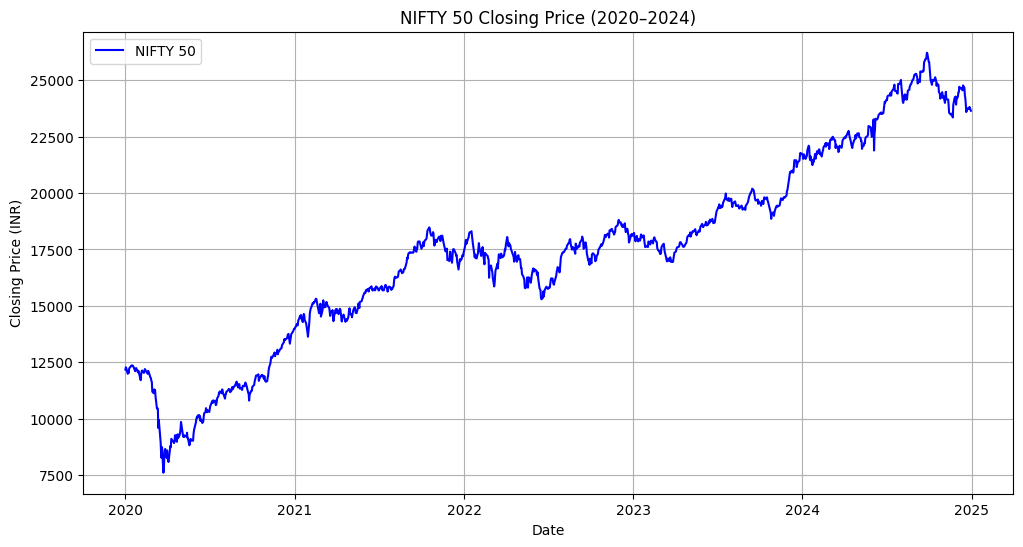

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(nifty['Close'], label='NIFTY 50', color='blue')
plt.title("NIFTY 50 Closing Price (2020–2024)")
plt.xlabel("Date")
plt.ylabel("Closing Price (INR)")
plt.legend()
plt.grid(True)
plt.show()


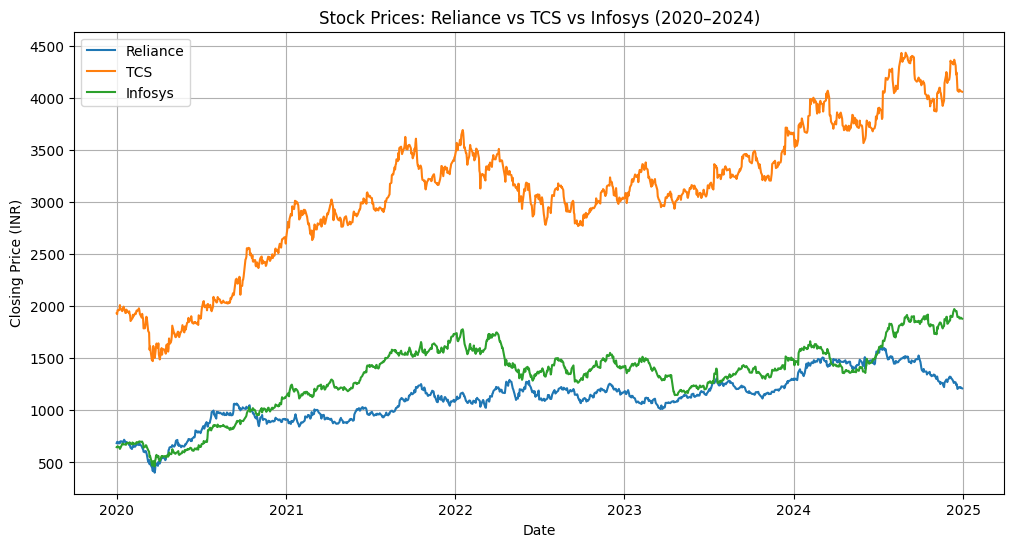

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(reliance['Close'], label='Reliance')
plt.plot(tcs['Close'], label='TCS')
plt.plot(infosys['Close'], label='Infosys')
plt.title("Stock Prices: Reliance vs TCS vs Infosys (2020–2024)")
plt.xlabel("Date")
plt.ylabel("Closing Price (INR)")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
print(nifty.index)


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=1236, freq=None)


In [13]:
# Convert index to datetime if needed
for df in [nifty, reliance, tcs, infosys]:
    df.index = pd.to_datetime(df.index)

# Fix: Use 'Y' → 'Y' is deprecated, so use 'YE' instead
def annual_return(data):
    try:
        return data['Close'].resample('YE').ffill().pct_change() * 100
    except Exception as e:
        print("Error with data:", e)
        return pd.Series()

# Calculate annual returns individually
nifty_returns = annual_return(nifty)
reliance_returns = annual_return(reliance)
tcs_returns = annual_return(tcs)
infosys_returns = annual_return(infosys)

# Combine into a single DataFrame
returns_df = pd.concat([nifty_returns, reliance_returns, tcs_returns, infosys_returns], axis=1)
returns_df.columns = ['NIFTY 50', 'RELIANCE.NS', 'TCS.NS', 'INFY.NS']
display(returns_df)

,NIFTY 50,RELIANCE.NS,TCS.NS,INFY.NS
Date,,,,
2020-12-31,NaN,NaN,NaN,NaN
2021-12-31,24.119304,19.284242,32.014203,53.291231
2022-12-31,4.328960,7.911688,-11.683217,-18.377468
2023-12-31,20.027834,10.336447,20.345107,5.017716
2024-12-31,8.805231,-6.327010,11.212325,26.715578


In [16]:
# Make sure all indexes are datetime
for df in [reliance, tcs, infosys]:
    df.index = pd.to_datetime(df.index)

# Define function using 'YE' (Year End)
def annual_return(data):
    # Ensure the function returns a Series with a proper index even if empty
    returns = data['Close'].resample('YE').ffill().pct_change() * 100
    return returns

# Calculate yearly returns individually
reliance_returns = annual_return(reliance)
tcs_returns = annual_return(tcs)
infosys_returns = annual_return(infosys)

# Combine into a single DataFrame using concat for robust index handling
returns_df = pd.concat([reliance_returns, tcs_returns, infosys_returns], axis=1)
returns_df.columns = ['Reliance', 'TCS', 'Infosys']

# Clean up index
returns_df = returns_df.dropna(how='all') # Drop rows where all values are NaN
returns_df.index = returns_df.index.year
display(returns_df)

,Reliance,TCS,Infosys
Date,,,
2021,19.284242,32.014203,53.291231
2022,7.911688,-11.683217,-18.377468
2023,10.336447,20.345107,5.017716
2024,-6.327010,11.212325,26.715578


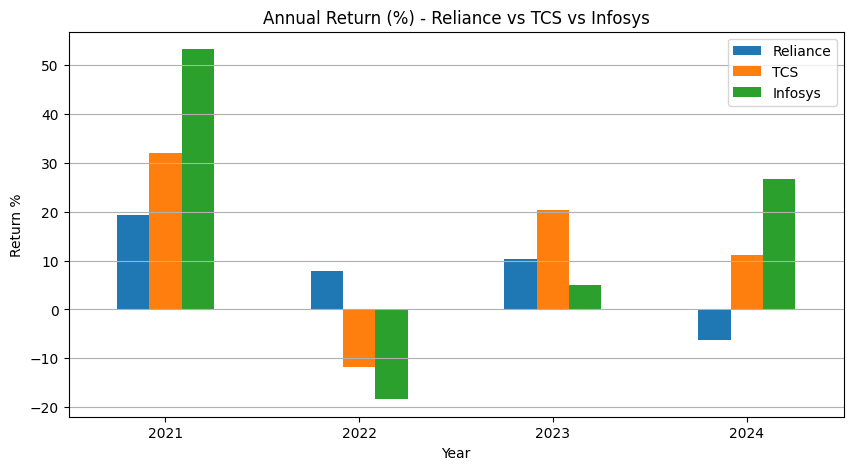

In [17]:
returns_df.plot(kind='bar', figsize=(10, 5))
plt.title("Annual Return (%) - Reliance vs TCS vs Infosys")
plt.ylabel("Return %")
plt.xlabel("Year")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


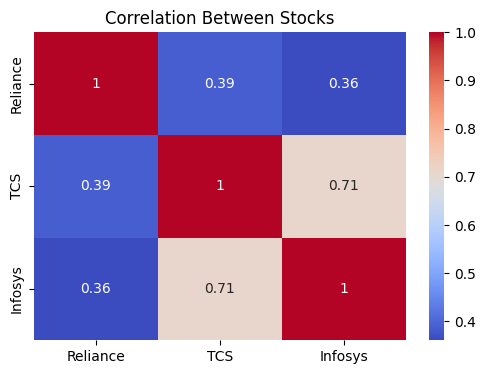

In [19]:
# Combine stock closing prices into one DataFrame
combined_df = pd.concat([reliance['Close'], tcs['Close'], infosys['Close']], axis=1)
combined_df.columns = ['Reliance', 'TCS', 'Infosys']


# Calculate daily % returns
returns = combined_df.pct_change()

# Plot heatmap of correlation
plt.figure(figsize=(6, 4))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Stocks")
plt.show()

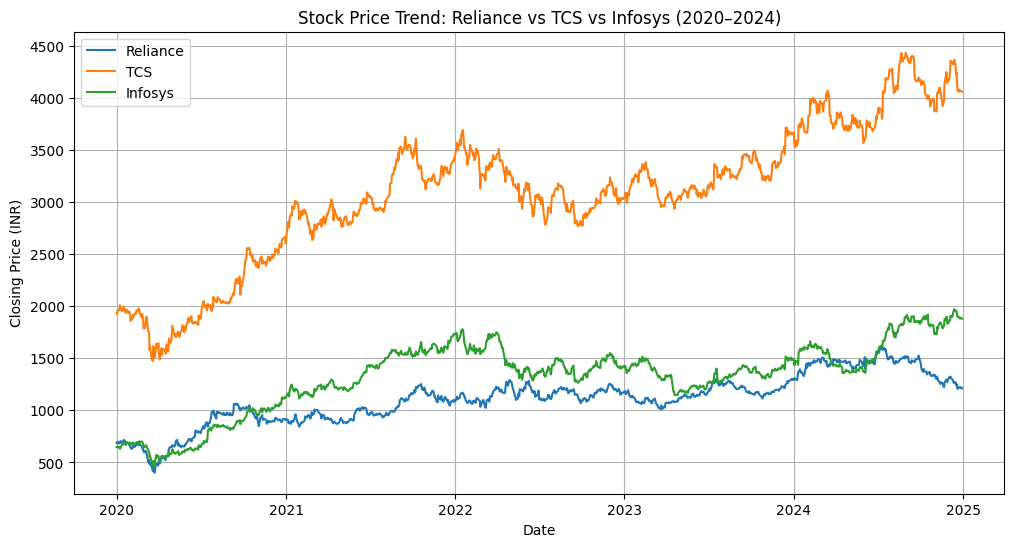

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(reliance['Close'], label='Reliance')
plt.plot(tcs['Close'], label='TCS')
plt.plot(infosys['Close'], label='Infosys')
plt.title("Stock Price Trend: Reliance vs TCS vs Infosys (2020–2024)")
plt.xlabel("Date")
plt.ylabel("Closing Price (INR)")
plt.legend()
plt.grid(True)
plt.show()
